# Analyzing e-commerce data

Your csv file contains information about the sales of the products you choose. The release year, genre, ratings and number of sales for different territories are present in this file.

## Getting started with the dataset


In [2]:
# Use the pandas library to read your csv file
import pandas as pd
import datetime
df = pd.read_csv("database.csv")

In [98]:
# How many columns does it contains?
cols = len(df.axes[1])
print("Columns count:", cols)

Nombre de colonnes: 12


In [140]:
# How many **unique** product are reported in this dataset?
nbUniqueElements = df['Name'].unique()
print("Unique elements count:",len(nbUniqueElements))

Unique elements count: 24


## Data analyze

In [14]:
# What is the oldest release year? The most recent?

min_val = df['CreationDate'].min()
formated_min = datetime.datetime.fromtimestamp(int(min_val)/ 1e3).year
print("Oldest release year:",formated_min)

max_val = df['CreationDate'].max()
formated_max = datetime.datetime.fromtimestamp(int(max_val)/ 1e3).year
print("Newest release year:", formated_max)



Oldest release year: 2014
Newest release year: 2022


In [138]:
# How many different publishers are present? List them
nbSuppliers = df['Suppliers'].nunique()
print("Publishers count:",nbSuppliers)

Publishers count: 307


In [144]:
# Count the number of products released for each category.
# Sort them in increasing order, and print them in a 
# horizontal bar graph.
result = df.groupby('Category')['Name'].apply(list)

for i in range(len(result)):
    print(result.index[i] + ":", len(result[i]), "products")



Automotive: 56 products
Baby: 49 products
Beauty: 101 products
Books: 58 products
Clothing: 45 products
Computers: 42 products
Electronics: 42 products
Games: 49 products
Garden: 57 products
Grocery: 41 products
Health: 55 products
Home: 46 products
Industrial: 33 products
Jewelery: 47 products
Kids: 32 products
Movies: 54 products
Music: 63 products
Outdoors: 30 products
Shoes: 42 products
Sports: 25 products
Tools: 14 products
Toys: 34 products


<AxesSubplot: >

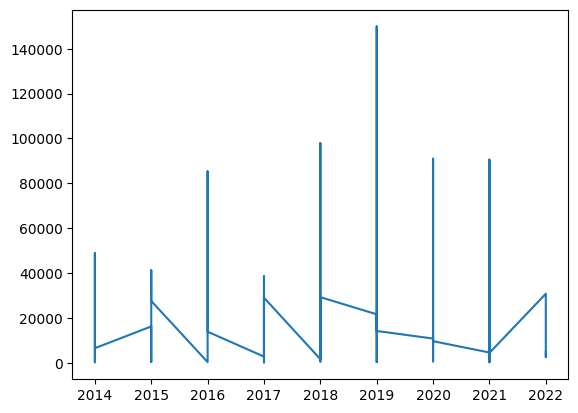

In [149]:
# Print with a plot line the global sales for each year.
# What was the most selling year?
from pandas import Series

dataDraft = df.groupby('CreationDate')['Total'].apply(list).to_dict()

new_indexes = []
values = []
for key in dataDraft.keys():
    new_indexes.append(datetime.datetime.fromtimestamp(int(key) / 1e3).year)
    tempValues = dataDraft[key]
    tempSlice = 0.0
    for element in tempValues:
        tempSlice += int(element[:-1])
    values.append(tempSlice)
    
finalData = pd.Series(values, new_indexes)

finalData.plot.line()

In [154]:
# What are the top 10 most selling product?

sellingDataDraft = df.groupby('Name')['Total'].apply(list)
# sellingDataDraft

for i in range(len(sellingDataDraft.values)):
    tempValues = sellingDataDraft.values[i]
    totalByObject = 0.0
    for element in tempValues:
        totalByObject += int(element[:-1])
    totalInEuros = str(totalByObject)
    sellingDataDraft.values[i] = totalByObject

topBoard = 10
sellingFinalData = sellingDataDraft.sort_values(ascending=False)
print("Top " + str(topBoard) + "most selling products:\n",sellingFinalData[:topBoard])

        

Top 10most selling products:
 Name
Keyboard    319840.0
Car         292316.0
Pizza       290807.0
Hat         278792.0
Mouse       266539.0
Towels      265702.0
Cheese      248488.0
Soap        232954.0
Shoes       222867.0
Fish        212166.0
Name: Total, dtype: object


<AxesSubplot: ylabel=' '>

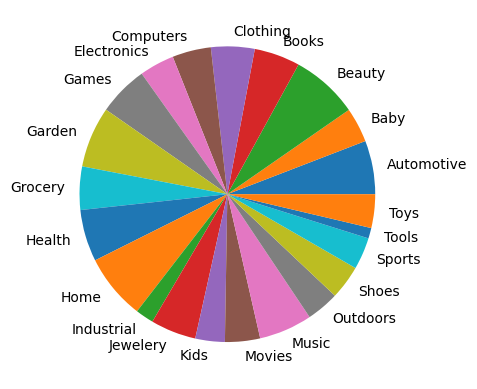

In [115]:
# Use a **pie** chart to visualize the sales of the different category


categorySales_DataDraft = df.groupby('Category')['Total'].apply(list)
categorySales_DataDraft



for i in range(len(categorySales_DataDraft.values)):
    tempValues = categorySales_DataDraft.values[i]
    totalByCategory = 0.0
    for element in tempValues:
        totalByCategory += int(element[:-1])
    totalInEuros = str(totalByCategory)
    categorySales_DataDraft.values[i] = totalByCategory



dataToShow = categorySales_DataDraft.plot.pie()
dataToShow.set_ylabel(" ")
dataToShow


In [150]:
# What are the top 10 best selling product in one category of your choice?
bestBycategory_DataDraft = df.groupby(['Category', 'Name'])['Total'].apply(list)

# bestBycategory_DataDraft

for i in range(len(bestBycategory_DataDraft)):
    tempPrice = bestBycategory_DataDraft[i]
    tempTotal = 0
    for element in tempPrice:
        tempTotal += int(element[:-1])
    bestBycategory_DataDraft[i] = tempTotal

bestBycategory_DataDraft['Grocery'].sort_values(ascending=False)
# bestBycategory_DataDraft


Name
Shoes       65325
Keyboard    28560
Bike        20392
Car         19360
Ball        13857
Pizza       13160
Sausages    11172
Cheese      10692
Towels      10679
Chips        8580
Shirt        8362
Salad        6863
Name: Total, dtype: object

In [153]:
# What is the average "price" for America invoices? 

averageByContinent_DataDraft = df.groupby('Continent')['Total'].apply(list)
americaAmount = averageByContinent_DataDraft['America']

for i in range(len(americaAmount)):
    americaAmount[i] = int(americaAmount[i][:-1])

avg = round((sum(americaAmount)/len(americaAmount)),2)
print("Average price for america's invoices:", avg)


Average price for america's invoices: 4743.49


In [38]:
# Find the ratio of invoices between America and Europe
ratioByContinent_DataDraft = df.groupby('Continent')['InvoiceId'].apply(list)

americaAmount = ratioByContinent_DataDraft['America']
europeAmount = ratioByContinent_DataDraft['Europe']

# Ratio
print(round((len(americaAmount)/len(europeAmount)*100)), "% of Invoices in America over Europe")


105 % of Invoices in America over Europe


In [65]:
# What is/are the most rated product(s) ?
mostRated_DataDraft = df.groupby('Name')['Rating']

mostRated_DataDraft.mean().sort_values(ascending=False)[:3]


Name
Pizza     3.069667
Cheese    2.938448
Shirt     2.896111
Name: Rating, dtype: float64

In [155]:
# what is the most rated product considering the number of people who rate this one
mostRatedUsers_DataDraft = df.groupby('Name')['Rating'].apply(list)

nbVotes = []
averages = []
for i in range(len(mostRated_DataDraft)):
    averages.append(round(sum(mostRatedUsers_DataDraft[i]) / len(mostRatedUsers_DataDraft[i]),2))
    nbVotes.append(len(mostRatedUsers_DataDraft[i]))

# averages
finalData = pd.Series(averages, [mostRatedUsers_DataDraft.index,nbVotes])


finalData.sort_values(ascending=False)[:1]



Name     
Pizza  60    3.07
dtype: float64

In [159]:
# What is the number of invoices containing the product found before ?

invoicesByProduct_DataDraft = df.groupby('Name')['InvoiceId'].apply(list)

res = len(invoicesByProduct_DataDraft['Pizza'])
print("Number of invoices containg the product found before:",res)


# What can you conclude about this ?

# Every customers did rate the product they bought, making the most sold item, the most rated one.

Number of invoices containg the product found before: 60
